<a href="https://colab.research.google.com/github/RajaAbitha/RajaAbitha/blob/main/Assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Assignment 05

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Load data
data = pd.read_csv('/content/mobile_price_classification.csv')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [4]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
data.isna().sum()

,0
battery_power,0
bluetooth,0
clock_speed,0
dual_sim,0
front_cam,0
4G,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [8]:
# Separate features and labels
X = data.drop('price_range', axis=1)
y = data['price_range']

In [9]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Convert labels to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [12]:
# Building basic ANN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3062 - loss: 1.4091 - val_accuracy: 0.4500 - val_loss: 1.2438
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5087 - loss: 1.1499 - val_accuracy: 0.5562 - val_loss: 1.0245
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6372 - loss: 0.9187 - val_accuracy: 0.6625 - val_loss: 0.8221
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7359 - loss: 0.7137 - val_accuracy: 0.7563 - val_loss: 0.6600
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8273 - loss: 0.5510 - val_accuracy: 0.8094 - val_loss: 0.5515
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8766 - loss: 0.4607 - val_accuracy: 0.8469 - val_loss: 0.4651
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9053 - loss: 0.3887 - val_accuracy: 0.8750 - val_loss: 0.4057
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9241 - loss: 0.3320 - val_accuracy: 0.8844 - val_loss

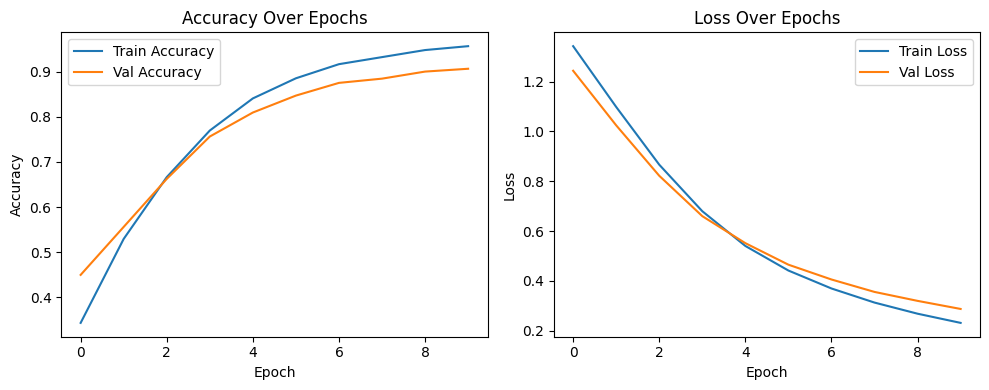

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
# Step 7: Evaluate the Model on Test Data

test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.2f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9350 - loss: 0.2677  
Test Accuracy: 0.91


In [15]:
# Evaluate
error = model.evaluate(X_test, y_test_cat)
print(f"Test Error: {error}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9350 - loss: 0.2677 
Test Error: [0.28115350008010864, 0.9075000286102295]


In [16]:
# predict the model
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1)
predicted_labels = predicted_labels.numpy()
print("Predicted Labels:", predicted_labels)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Labels: [0 2 1 3 1 1 2 0 3 1 0 1 2 3 3 2 3 3 1 0 0 2 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 2 3 1 1 3 1 3 1 0 0 1 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 1 3 2 1 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 0 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 1 2 3 1 3 2 0 0 0 1
 1 3 3 1 1 0 2 2 0 2 0 2 2 3 3 3 1 0 0 2 2 3 3 1 0 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 1 2 3 3 3 1 2 0 0 0 2 1 1 3 1 1 2 2 1 3 2
 3 0 0 2 0 3 0 1 1 0 2 3 1 0 1 3 3 0 1 3 2 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 0 2 2 3 2 3 0 2 3 2 3 2 1 0 1 0 3 3 1 3 1 1 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 1 3 2 0 2 1 2 1 0 0 1 2 3 3 1 0 1 1 1 2 3 0 3
 3 2 1 3 0 0 2 1 3 2 0 1 1 2 0 1 3 2 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 2 2 3
 3 3 3 2 1 2 0 3 2 3 3 0 2 3 2 3 3 3 1 0 2 3 0 0 3 3 2 1 1 2]


In [19]:
# print the predicted value
print("Predicted Value:", predicted_labels[1])


Predicted Value: 2
